<a href="https://colab.research.google.com/github/Arthur-Barreto/Machine-Vision/blob/main/VisComp_Class_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 13: Pooling and Dropout Layers

## Preliminaries

Run the cell below to download the class pack.

In [17]:
import gdown

gdown.download(id='1O4Ia0u485FrZxvdSQctZmHvcIjSA3PT0')

!unzip -o '13.zip'
!rm '13.zip'

Downloading...
From: https://drive.google.com/uc?id=1O4Ia0u485FrZxvdSQctZmHvcIjSA3PT0
To: /content/13.zip
100%|██████████| 1.10k/1.10k [00:00<00:00, 642kB/s]

Archive:  13.zip
  inflating: sdx.py                  


Run the cell below to import the class modules.

If you get import warnings, try using **Ctrl+m .** (notice there is a dot there) to restart the kernel.

In [18]:
from sdx import *
from tensorflow import keras

## MNIST

### Loading and preparing the dataset

In [19]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [20]:
train_images = train_images.astype(float) / 255
test_images = test_images.astype(float) / 255

In [21]:
inputs = keras.Input(shape=(28, 28, 1))

### Training and evaluating the neural network

In [148]:
layer = keras.layers.Conv2D(32, 3, activation='tanh')
outputs = layer(inputs)

layer = keras.layers.Conv2D(32, 3, activation='sigmoid')
outputs = layer(outputs)

layer = keras.layers.Dense(32, activation='relu')
outputs = layer(outputs)

layer = keras.layers.MaxPooling2D(2)
outputs = layer(outputs)

layer = keras.layers.Dropout(0.2)
outputs = layer(outputs)

layer = keras.layers.Conv2D(32, 3, activation='relu')
outputs = layer(outputs)

layer = keras.layers.MaxPooling2D(2)
outputs = layer(outputs)

# layer = keras.layers.Dropout(0.1)
# outputs = layer(outputs)

layer = keras.layers.Flatten()
outputs = layer(outputs)

layer = keras.layers.Dense(10, activation='softmax')
outputs = layer(outputs)

model = keras.Model(inputs, outputs)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy())

model.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_78 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_79 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 dense_34 (Dense)            (None, 24, 24, 32)        1056      
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_46 (Dropout)        (None, 12, 12, 32)        0         
                                                          

In [149]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2693 - val_loss: 0.0743
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0692 - val_loss: 0.0546
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0522 - val_loss: 0.0476
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0427 - val_loss: 0.0381
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0369 - val_loss: 0.0430
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0335 - val_loss: 0.0398
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0291 - val_loss: 0.0351
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0261 - val_loss: 0.0325
Epoch 9/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0252 - val_loss: 0.0345
Epoch 10/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.022

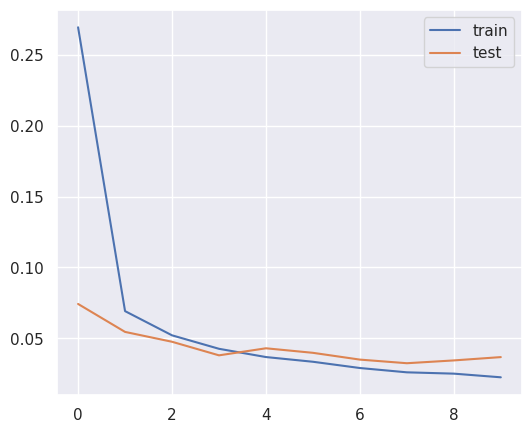

In [150]:
plot_loss(history)

313/313 [==============================] - 1s 3ms/step


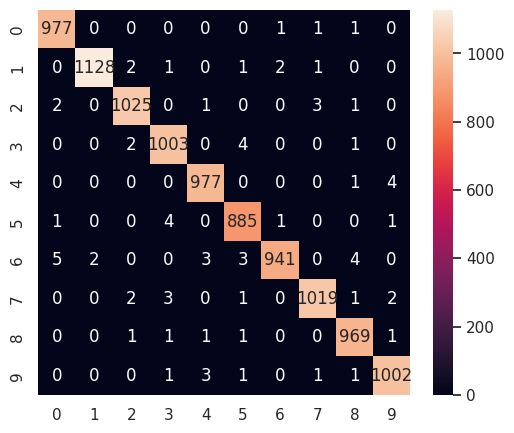

In [151]:
plot_confusion(model, test_images, test_labels)

In [152]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0288


0.02877502143383026

## CIFAR10

### Loading and preparing the dataset

In [10]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 9s 0us/step


In [11]:
train_images = train_images.astype(float) / 255
test_images = test_images.astype(float) / 255

In [12]:
inputs = keras.Input(shape=(32, 32, 3))

### Training and evaluating the neural network

In [13]:
layer = keras.layers.Conv2D(32, 3, activation='relu')
outputs = layer(inputs)

layer = keras.layers.MaxPooling2D(2)
outputs = layer(outputs)

layer = keras.layers.Dropout(0.5)
outputs = layer(outputs)

layer = keras.layers.Flatten()
outputs = layer(outputs)

layer = keras.layers.Dense(10, activation='softmax')
outputs = layer(outputs)

model = keras.Model(inputs, outputs)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy())

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                72010     
                                                           

In [14]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.6056 - val_loss: 1.4181
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.3525 - val_loss: 1.2859
Epoch 3/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.2790 - val_loss: 1.2367
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2298 - val_loss: 1.2627
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1873 - val_loss: 1.1790
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1655 - val_loss: 1.1457
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1397 - val_loss: 1.1798
Epoch 8/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1239 - val_loss: 1.1881
Epoch 9/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.1116 - val_loss: 1.1308
Epoch 10/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.102

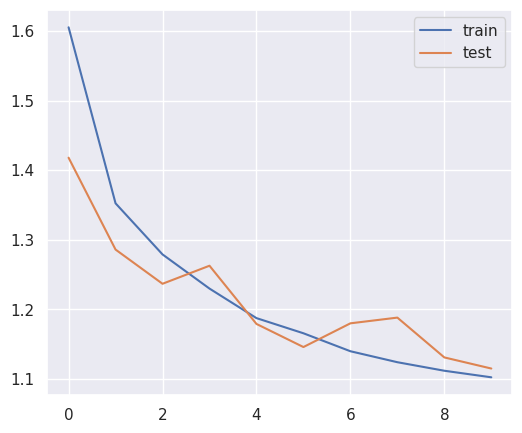

In [15]:
plot_loss(history)

313/313 [==============================] - 1s 2ms/step


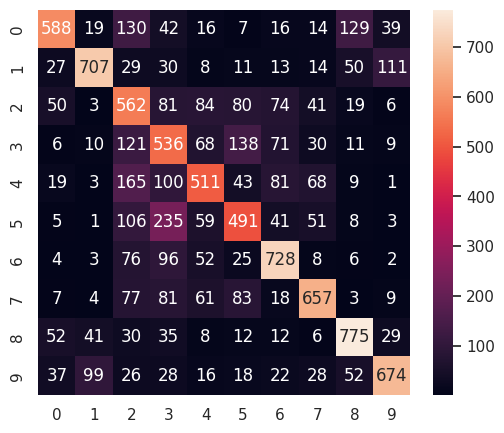

In [16]:
plot_confusion(model, test_images, test_labels)

You can click on the toc.png tab to the left to browse by section.